In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dataset manually entered from the image
data = {
    'Amplitude': [1, 1.5, 0.8, 2, 1.2, 1.7, 0.9, 2.1, 1.1, 1.8, 0.95, 2.2, 1, 1.9, 1.3],
    'Frequency': [50, 60, 55, 40, 65, 45, 70, 35, 60, 48, 62, 42, 58, 46, 66],
    'Duration': [1, 0.5, 1.2, 1, 0.8, 1.5, 1, 1.3, 0.9, 1, 1.1, 0.7, 1, 1.2, 0.6],
    'Peak_to_Peak': [2, 3, 1.6, 4, 2.4, 3.4, 1.8, 4.2, 2.2, 3.6, 1.9, 4.4, 2, 3.8, 2.6],
    'Label': ['Sine', 'Square', 'Sine', 'Square', 'Sine', 'Square', 'Sine', 'Square',
              'Sine', 'Square', 'Sine', 'Square', 'Sine', 'Square', 'Sine']
}

# Create DataFrame
df = pd.DataFrame(data)

# Encode labels: Sine → 0, Square → 1
df['Label'] = df['Label'].map({'Sine': 0, 'Square': 1})

# Features and target
X = df[['Amplitude', 'Frequency', 'Duration', 'Peak_to_Peak']]
y = df['Label']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Sine', 'Square']))




Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

        Sine       1.00      1.00      1.00         1
      Square       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Data
data = {
    'Voltage': [5.0, 5.5, 4.8, 6.0, 6.5, 6.2, 4.9, 5.8, 5.2, 6.3],
    'Current': [0.5, 0.4, 0.6, 0.3, 0.2, 0.25, 0.55, 0.35, 0.5, 0.22],
    'Status': ['Working', 'Working', 'Working', 'Defective', 'Defective',
               'Defective', 'Working', 'Defective', 'Working', 'Defective']
}

df = pd.DataFrame(data)

# Step 2: Encode labels (Working → 0, Defective → 1)
df['Status'] = df['Status'].map({'Working': 0, 'Defective': 1})

# Step 3: Features and Target
X = df[['Voltage', 'Current']]
y = df['Status']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Step 7: Predict & Evaluate
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Working", "Defective"]))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

     Working       1.00      1.00      1.00         2
   Defective       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Model Coefficient (slope): 3.7575757575757556
Model Intercept: 40.61818181818183
Predicted score for 9.5 study hours: 76.32


C:\Users\jana\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


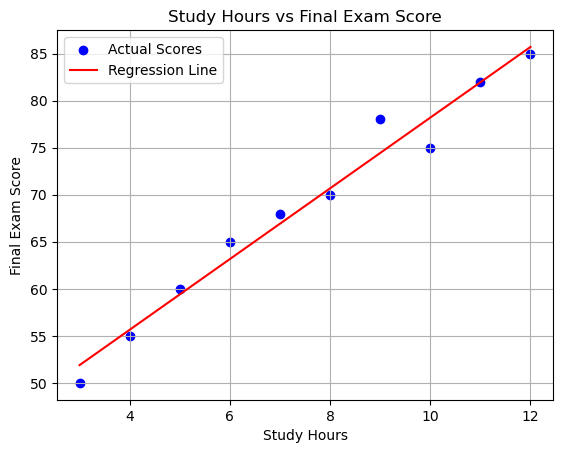

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Prepare Data
data = {
    'Study_Hours': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Final_Score': [50, 55, 60, 65, 68, 70, 78, 75, 82, 85]
}

df = pd.DataFrame(data)

# Step 2: Reshape input for sklearn
X = df[['Study_Hours']]  # 2D array
y = df['Final_Score']    # 1D array

# Step 3: Create and train model
model = LinearRegression()
model.fit(X, y)

# Step 4: Predict scores
y_pred = model.predict(X)

# Step 5: Display results
print("Model Coefficient (slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)

# Step 6: Predict for new study hours (optional)
new_hours = [[9.5]]
predicted_score = model.predict(new_hours)
print(f"Predicted score for 9.5 study hours: {predicted_score[0]:.2f}")

# Step 7: Visualization
plt.scatter(X, y, color='blue', label='Actual Scores')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel("Study Hours")
plt.ylabel("Final Exam Score")
plt.title("Study Hours vs Final Exam Score")
plt.legend()
plt.grid(True)
plt.show()


Model Coefficient (slope): 2.8060606060606053
Model Intercept: -5614.90909090909
Predicted price in 2025: ₹67.36 Lakhs


C:\Users\jana\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


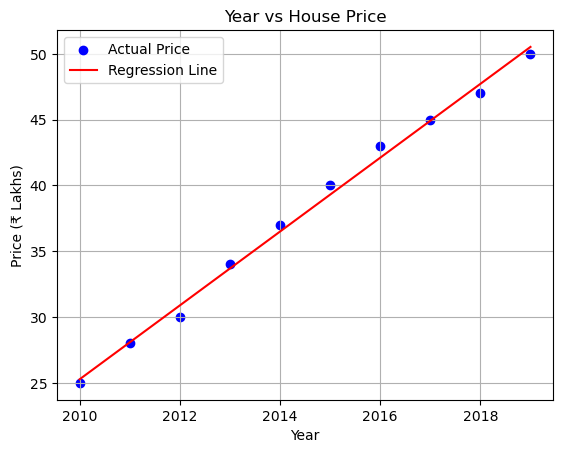

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Prepare Data
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'Price': [25, 28, 30, 34, 37, 40, 43, 45, 47, 50]
}

df = pd.DataFrame(data)

# Step 2: Define Features and Target
X = df[['Year']]  # 2D array for sklearn
y = df['Price']   # 1D array

# Step 3: Create and train model
model = LinearRegression()
model.fit(X, y)

# Step 4: Predict prices
y_pred = model.predict(X)

# Step 5: Print model details
print("Model Coefficient (slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)

# Step 6: Predict future price (optional)
future_year = [[2025]]
future_price = model.predict(future_year)
print(f"Predicted price in 2025: ₹{future_price[0]:.2f} Lakhs")

# Step 7: Plot results
plt.scatter(X, y, color='blue', label='Actual Price')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel("Year")
plt.ylabel("Price (₹ Lakhs)")
plt.title("Year vs House Price")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create the dataset
data = {
    'Transmitter': ['T1', 'T2', 'T1', 'T3', 'T2', 'T1', 'T3', 'T2', 'T1', 'T3'],
    'Signal_Strength': [75, 50, 90, 40, 85, 70, 30, 60, 80, 20],
    'Frequency': [2000, 1500, 2200, 1300, 2100, 1800, 1200, 1600, 1900, 1100],
    'Signal_Quality': ['Good', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad']
}

df = pd.DataFrame(data)

# Step 2: Encode categorical columns
le_transmitter = LabelEncoder()
le_quality = LabelEncoder()

df['Transmitter'] = le_transmitter.fit_transform(df['Transmitter'])  # T1, T2, T3 -> 0,1,2
df['Signal_Quality'] = le_quality.fit_transform(df['Signal_Quality'])  # Good->1, Bad->0

# Step 3: Feature and Target split
X = df[['Transmitter', 'Signal_Strength', 'Frequency']]
y = df['Signal_Quality']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Step 5: Model training
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Step 6: Prediction & Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Bad", "Good"]))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         Bad       1.00      1.00      1.00         2
        Good       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



C:\Users\jana\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


     Voltage   Current  Cluster
0   4.819941  0.872930        0
1   5.249783  0.918350        0
2   4.771115  0.955877        0
3   4.602771  1.087780        0
4   4.814910  0.877739        0
5  12.382800  2.257414        1
6  12.346060  2.383650        1
7  11.229500  1.891070        1
8  12.179700  1.825070        1
9  12.063800  2.295750        1


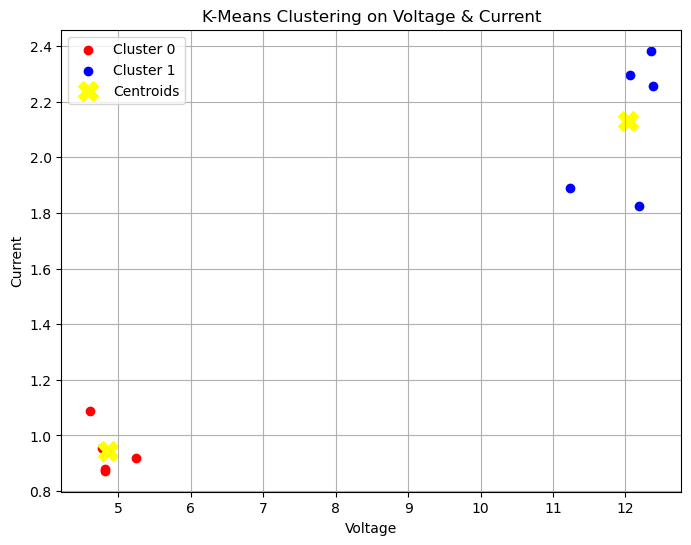

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Define dataset
data = {
    'Voltage': [4.819941, 5.249783, 4.771115, 4.602771, 4.81491,
                12.3828, 12.34606, 11.2295, 12.1797, 12.0638],
    'Current': [0.87293, 0.91835, 0.955877, 1.08778, 0.877739,
                2.257414, 2.38365, 1.89107, 1.82507, 2.29575]
}

df = pd.DataFrame(data)

# Step 2: Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Voltage', 'Current']])

# Step 3: Show results
print(df)

# Step 4: Visualize
colors = ['red', 'blue']
plt.figure(figsize=(8,6))
for cluster in range(2):
    clustered = df[df['Cluster'] == cluster]
    plt.scatter(clustered['Voltage'], clustered['Current'], 
                color=colors[cluster], label=f'Cluster {cluster}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200, c='yellow', marker='X', label='Centroids')

plt.title("K-Means Clustering on Voltage & Current")
plt.xlabel("Voltage")
plt.ylabel("Current")
plt.legend()
plt.grid(True)
plt.show()
